In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import root
from functools import partial
import math

# Homework CNS Week 2
## Stefan Iacob (s4575121), Bas Krahmer (s4616553), Davide Sabeddu (s1032453)

## Assignment 1
### a)
<img src="2.1a (Part I).jpg">
<img src="2.1a (Part II).jpg">
<img src="2.1a (Part III).jpg">



Numerical method for 1.a using Python code

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Check location:


In [125]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate


u, v = sm.symbols('r, c')
F = - v + v**3
G = - u + u**3

# Use sympy's way of setting equations to zero
FEqual = sm.Eq(F, 0)
GEqual = sm.Eq(G, 0)
    
# compute fixed points
equilibria = sm.solve( (FEqual, GEqual), u, v )
print(equilibria)

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]


The locations are the same that we found with the analytical method.

Now the check stability:

In [126]:
# System of first order differential equations

def u_prime(x, y):
    return -y - y**3

def v_prime(x, y):
    return -x - x**3

In [127]:
def f(Y, t=0):
    y1, y2 = Y
    return (-y2 + y2**3, -y1 + y1**3)

def createPlot(IC):

    y1 = np.linspace(-3, 3, 20)
    y2 = np.linspace(-3, 3, 20)


    Y1, Y2 = np.meshgrid(y1, y2)

    t = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]

            yprime = f((x, y))
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

# plot trajectories from an initial condition y0
    
    for y10, y20 in IC:
        tspan = np.linspace(0, 1, 300)
        y0 = [y10, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-', linewidth=0.3) # path
        plt.plot([ys[0,0]], [ys[0,1]], 'o', linewidth=0.3) # start
        plt.plot([ys[-1,0]], [ys[-1,1]], 's', linewidth=0.3) # end

    Q = plt.quiver(Y1, Y2, u, v, color='r')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.show()

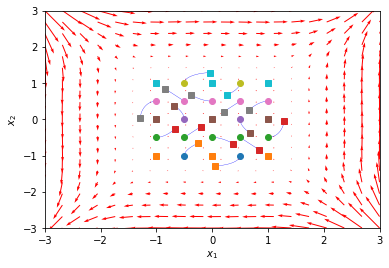

In [128]:
#Plot the phase space for different b values

IC = [(x1, x2) for x1 in np.linspace(-1, 1, 5) for x2 in np.linspace(-1, 1, 5)]

createPlot(IC)

C:\Users\stiac\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


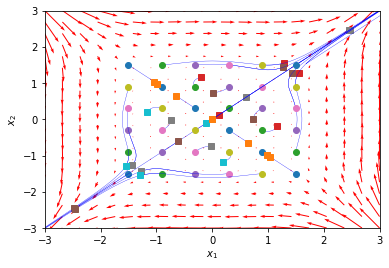

In [129]:
IC = [(x1, x2) for x1 in np.linspace(-1.5, 1.5, 6) for x2 in np.linspace(-1.5, 1.5, 6)]

createPlot(IC)

From the study of the phase plane's trajectories with several initial conditions, we have found that the fixed points B = (0, 1), D = (1, 0), F = (0, -1), H = (-1, 0) are still indeterminate fixed points, while A = (0, 0), C = (1, 1), E = (1, -1), G = (-1, -1), and I = (-1, -1) are saddle nodes. This confirms the results of the analytical method that we have previously used.

### b)
<img src="2_1b-1.jpg">

### c)

Find number and location of the FPs varying the parameter a:

[(-1.00000000000000, 0.0), (0.0, 0.0), (0.380832171826984, 0.725165715492288), (-0.190416085913492 - 0.262249608815424*I, -0.162582857746144 + 0.499365440429776*I), (-0.190416085913492 + 0.262249608815424*I, -0.162582857746144 - 0.499365440429776*I)] Real FPs for a = -5.0 



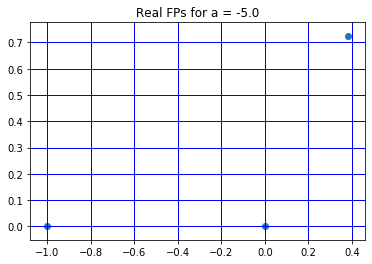

[(-1.00000000000000, 0.0), (0.0, 0.0), (0.640239417973448, 1.02476628081745), (-0.320119708986724 - 0.383965993605208*I, -0.112383140408725 + 0.614575410668489*I), (-0.320119708986724 + 0.383965993605208*I, -0.112383140408725 - 0.614575410668489*I)] Real FPs for a = -2.5 



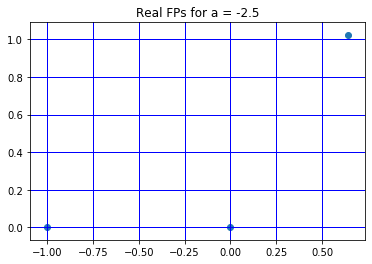

[(-1, 0), (0, 0)] Real FPs for a = 0.0 



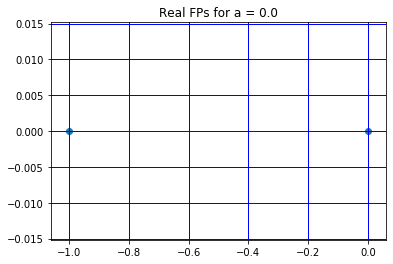

[(-1.00000000000000, 0.0), (0.0, 0.0), (0.640239417973448, -1.02476628081745), (-0.320119708986724 - 0.383965993605208*I, 0.112383140408725 - 0.614575410668489*I), (-0.320119708986724 + 0.383965993605208*I, 0.112383140408725 + 0.614575410668489*I)] Real FPs for a = 2.5 



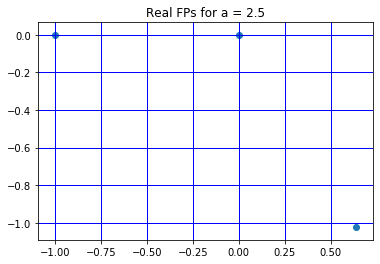

[(-1.00000000000000, 0.0), (0.0, 0.0), (0.380832171826984, -0.725165715492288), (-0.190416085913492 - 0.262249608815424*I, 0.162582857746144 - 0.499365440429776*I), (-0.190416085913492 + 0.262249608815424*I, 0.162582857746144 + 0.499365440429776*I)] Real FPs for a = 5.0 



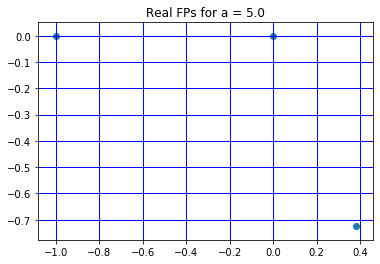

In [130]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate

A = np.linspace(-5, 5, num=5)

for a in A:
    u, v = sm.symbols('r, c')
    F = v + u*v + a*u*(v)**2
    G = - u - u**2 + (v)**2

    # Use sympy's way of setting equations to zero
    FEqual = sm.Eq(F, 0)
    GEqual = sm.Eq(G, 0)

    # Compute fixed points
    equilibria = sm.solve( (FEqual, GEqual), u, v )
    print(equilibria, "Real FPs for a =", a, "\n")
    
    # Discard complex fixed points
    equilibria = [(xs, ys) for (xs, ys) in equilibria if xs.is_real and ys.is_real]
    
    #Plot real fixed points in the phase plane:
    plt.scatter([xs for (xs, ys) in equilibria],[ys for (xs, ys) in equilibria])
    plt.grid(color='b', linestyle='-', linewidth=1)
    plt.title("Real FPs for a = " + str(a))
    plt.show()

Check stability of the found FPs on the phase plane:

a = -1.5:

In [131]:
u, v = sm.symbols('r, c')
F = v + u*v + -1.5*u*(v)**2
G = - u - u**2 + (v)**2

# Use sympy's way of setting equations to zero
FEqual = sm.Eq(F, 0)
GEqual = sm.Eq(G, 0)

# Compute fixed points
equilibria = sm.solve( (FEqual, GEqual), u, v )

# Discard complex fixed points
equilibria = [(xs, ys) for (xs, ys) in equilibria if xs.is_real and ys.is_real] 

In [132]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ X[0] + X[0]*X[1] + 1.5*X[0]*X[1]**2 , - X[0] - X[0]**2 + X[1]**2 ])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


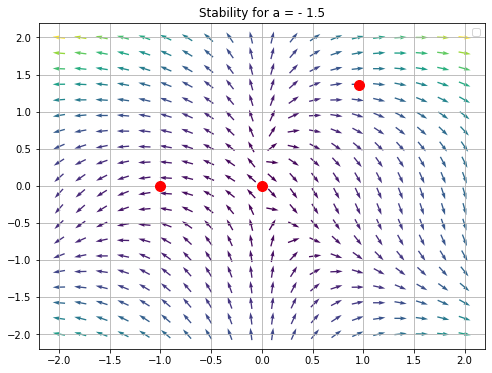

In [133]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

# plot fixed points
for point in equilibria:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Stability for a = - 1.5")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

a = 0:

In [134]:
u, v = sm.symbols('r, c')
F = v + u*v + 0*u*(v)**2
G = - u - u**2 + (v)**2

# Use sympy's way of setting equations to zero
FEqual = sm.Eq(F, 0)
GEqual = sm.Eq(G, 0)

# Compute fixed points
equilibria = sm.solve( (FEqual, GEqual), u, v )

# Discard complex fixed points
equilibria = [(xs, ys) for (xs, ys) in equilibria if xs.is_real and ys.is_real] 

In [135]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ X[0] + X[0]*X[1] + 0*X[0]*(X[1])**2 , - X[0] - X[0]**2 + X[1]**2 ])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


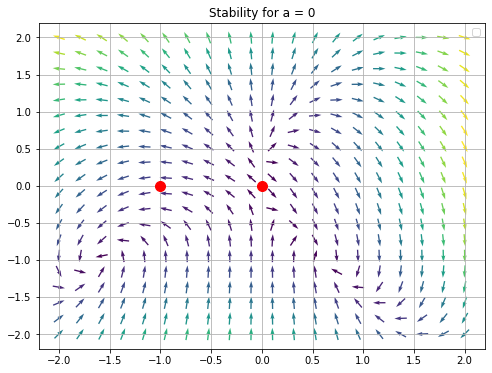

In [136]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

# plot fixed points
for point in equilibria:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Stability for a = 0")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

a = 1.5:

In [137]:
u, v = sm.symbols('r, c')
F = v + u*v + 1.5*u*(v)**2
G = - u - u**2 + (v)**2

# Use sympy's way of setting equations to zero
FEqual = sm.Eq(F, 0)
GEqual = sm.Eq(G, 0)

# Compute fixed points
equilibria = sm.solve( (FEqual, GEqual), u, v )

# Discard complex fixed points
equilibria = [(xs, ys) for (xs, ys) in equilibria if xs.is_real and ys.is_real] 

In [138]:
# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([ X[0] + X[0]*X[1] + 1.5*X[0]*X[1]**2 , - X[0] - X[0]**2 + X[1]**2 ])

No handles with labels found to put in legend.
No handles with labels found to put in legend.


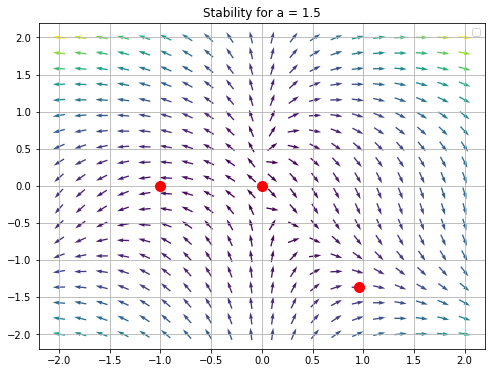

In [139]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

# plot fixed points
for point in equilibria:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Stability for a = 1.5")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

## Assignment 2
### a) & b)

<img src="2.2a (Part I).jpg">
<img src="2.2a (Part II).jpg">

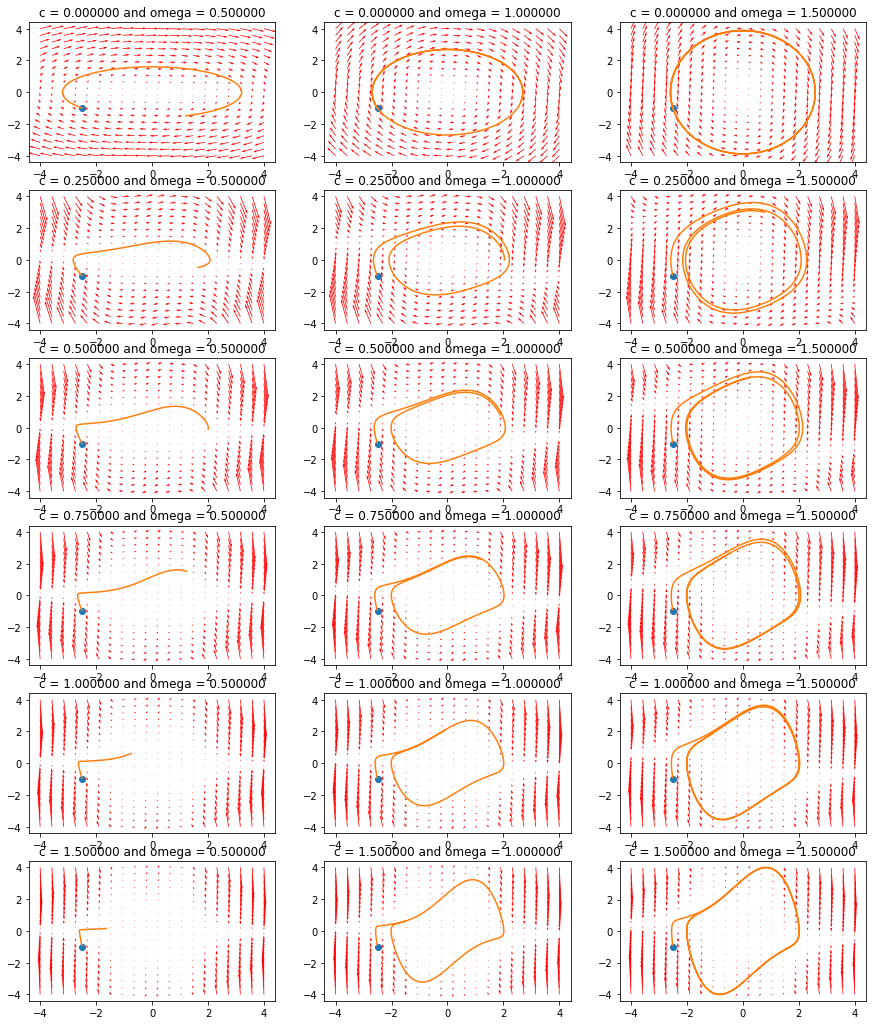

In [140]:
from scipy.integrate import ode
C = [0, 0.25, 0.5, 0.75, 1, 1.5]
Omega = [0.5, 1, 1.5]
y_start = np.array([-2.5,-1])
c_i = 0
om_i = 0
f = plt.figure(figsize=(15,18))
for c in C:
    for omega in Omega:
        def dx_dt(x, y, c, omega):
            return y

        def dy_dt(x, y, c, omega):
            return -omega**2 * x - c*(x**2 - 1)*y

        def vdpol(t, x, c, omega):
            y = [dx_dt(x[0], x[1], c, omega), dy_dt(x[0], x[1], c, omega)]
            return np.array(y)

        # code below inspired from http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/
        ##########################################################################
        y1 = np.linspace(-4, 4, 20)
        y2 = np.linspace(-4, 4, 20)
        Y1, Y2 = np.meshgrid(y1, y2)
        u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
        NI, NJ = Y1.shape
        t = 0
        for i in range(NI):
            for j in range(NJ):
                x = Y1[i, j]
                y = Y2[i, j]
                grad = vdpol(0,[x,y], c, omega)
                u[i,j] = grad[0]
                v[i,j] = grad[1]
        Q = plt.subplot(len(C), len(Omega), om_i + 1)
        Q = plt.quiver(Y1, Y2, u, v, color='r')
        ##########################################################################

        length = 1000
        Y = np.zeros((2,length))
        r = ode(vdpol)
        r.set_f_params(c,omega) # with this line we can incorporate parameter I
        r.set_initial_value(y_start, [0,0])
        for i in range(length):
            Y[:,i] = r.integrate(r.t + np.array([0.01, 0.01]))
        Q = plt.plot(y_start[0], y_start[1], 'o')
        # Plotting nullclines
        Q = plt.plot(Y[0,:], Y[1,:])
        Q = plt.title("c = %f and omega = %f" % (c, omega))
        om_i += 1
    c_i += 1

From the previous plots, we can see that the amplitude of the oscillations are higher with lower values of omega and c, the frequencies are higher with higher values of omega and higher values of c, and the duration of the transient towards the stable limit cycle is lower with higher values of c. The exception being with c = 0, where the limit cycle is immediately stable.

## Assignment 3

In [ ]:
def plot_radius(r_prime, plot_title, theta_prime=2*math.pi):
    c_vals = np.linspace(-2.0, 2.0, 2000)
    r_vals = np.linspace(-2.0, 2.0, 2000)
    steady_state_solutions = []
    
    # For all C values
    for c in c_vals:
        r_prime_vals = r_prime(r_vals, c)

        # Find the value where the derivative of r is closest to 0
        solution_index = np.where(r_prime_vals == min(r_prime_vals, key=lambda x:abs(x)))
        solution = r_vals[solution_index]

        steady_state_solutions.append(solution)
        
    plt.plot(c_vals, steady_state_solutions, label=plot_title)
    plt.xlabel('c')
    plt.ylabel('r')
    plt.xlim(-2, 2)
    plt.ylim(0,2)
    plt.legend()
    
    return plt


def r_prime1(r, c):
    return r*(c - r**2)

def r_prime2(r, c):
    return r*(c + 2*r**2 - r**4)

plot_radius(r_prime1, 'First function')
plot_radius(r_prime2, 'Second function')
plt.show()

In the above graph we can see how the second function behaves differently for -1<c<0 as opposed to c>-1. The stability for the points c=-1 amd c=0 are indeterminate, so these are the dangerous points. Oppositely, the first function has no change in dynamics.

### Stability of fixed points
<img src="3-1.jpg">
<img src="3-2.jpg">
